In [1]:
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from collections import defaultdict

# Read the asset history

In [2]:
# Create dict to store asset histories
asset_histories = defaultdict()

# Loop over seeds and read asset history
for seed in [42, 7, 25,14]:
    # Read all files 
    files = glob.glob(f'/Applications/Studium/Master/Masterarbeit/Ensemble_Strategy/results_seed_{seed}/account_value_trade_ensemble_*.csv')
    
    # Sort the files by trading number
    files_sorted = sorted(files, key=lambda x: int(x.split('_')[-1].split('.')[0]))

    # Read the files and concatenate them
    dataframes = [pd.read_csv(file,index_col=0) for idx,file in enumerate(files_sorted)]
    combined_df = pd.concat(dataframes, ignore_index=True)

    # Save the history
    asset_histories[f'Seed {seed}'] = list((combined_df.values)[:,0])

# Get the trading dates

In [3]:
# Read the trading dates
done_data = pd.read_csv(r'/Applications/Studium/Master/Masterarbeit/Ensemble_Strategy/done_data.csv',index_col=0)
pivot_done_data = done_data.pivot(index='datadate',columns='tic')

In [4]:
# Output terminal: 
# Ensemble Agent traded from 20160104 (======Trading from:  20160104 to  20160405) to ... 
# 20201005 (======Trading from:  20200707 to  20201005)
pivot_done_data = pivot_done_data.loc[(pivot_done_data.index >= 20160104) & (pivot_done_data.index < 20201005)]

In [5]:
# Trading dates:
pivot_done_data.index = pd.to_datetime(pivot_done_data.index, format='%Y%m%d')

# Load the Index

In [6]:
#Benchmark DJI
dji =yf.download('^DJI',start='2016-01-04',end='2020-10-05')
closes_dji = dji['Adj Close']
initial_val = closes_dji[0]
cum_returns_bm = [(close-initial_val)/initial_val for close in closes_dji];

[*********************100%%**********************]  1 of 1 completed
/var/folders/cp/6hchgv613zxclnc7zyc9qbcc0000gn/T/ipykernel_78725/1218063556.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initial_val = closes_dji[0]


# Plot the benchmark and the agent performance

In [7]:
# Asset history as dataframe
asset_histories = pd.DataFrame(asset_histories)

# Calculate mean and standard deviation at each point in time of the different trained agents
mean_asset_histories = asset_histories.mean(axis=1)
std_asset_histories = asset_histories.std(axis=1)

In [8]:
cumulative_returns = asset_histories/asset_histories.iloc[0]-1

In [9]:
# Calculate mean return at each timestep and standard deviation
mean_cum_return = cumulative_returns.mean(axis=1)
std_cum_return = cumulative_returns.std(axis=1)

In [10]:
num_days = len(pivot_done_data.iloc[pivot_done_data.index <= '2020-06-12'])

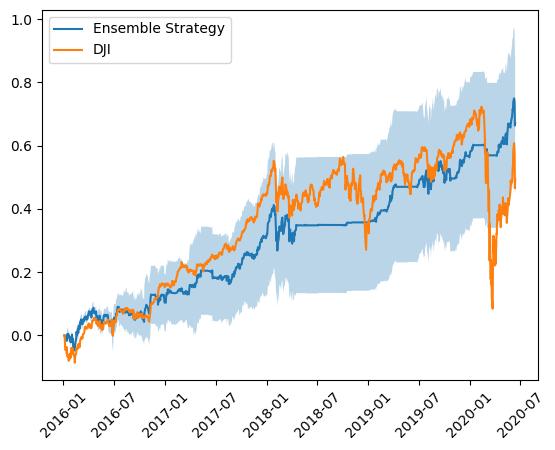

In [11]:
# Plot the mean performance of the ensemble agent
plt.plot(pivot_done_data.index[:num_days],mean_cum_return[:num_days],label='Ensemble Strategy')
plt.fill_between(pivot_done_data.index[:num_days],
                 mean_cum_return[:num_days] - std_cum_return[:num_days],
                 mean_cum_return[:num_days] + std_cum_return[:num_days], 
                 alpha=0.3)

# Plot Index
plt.plot(pivot_done_data.index[:num_days],cum_returns_bm[:num_days],label='DJI')

#plt.plot(pivot_done_data.index[:len(asset_histories['New'])], asset_histories['New'])
plt.xticks(rotation=45); 

plt.legend()

Trading history (copied from terminal while the ensemble agent was training):

- ======Trading from:  20160104 to  20160405
...
- ======Trading from:  20200707 to  20201005

# Saving the asset history

In [12]:
# Adjust the index
asset_histories.index = pivot_done_data.index

In [13]:
asset_histories

,Seed 42,Seed 7,Seed 25,Seed 14
datadate,,,,
2016-01-04,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06
2016-01-05,1.000278e+06,1.000487e+06,1.000605e+06,1.000387e+06
2016-01-06,9.957686e+05,9.983674e+05,1.000467e+06,9.987809e+05
2016-01-07,9.845582e+05,9.897826e+05,9.948460e+05,9.927025e+05
2016-01-08,9.800872e+05,9.851288e+05,9.918399e+05,9.904180e+05
...,...,...,...,...
2020-09-28,1.931460e+06,2.039765e+06,1.475066e+06,1.622855e+06
2020-09-29,1.931460e+06,2.039765e+06,1.475066e+06,1.622855e+06
2020-09-30,1.931460e+06,2.039765e+06,1.475066e+06,1.622855e+06


In [14]:
asset_histories.to_csv(r'/Applications/Studium/Master/Masterarbeit/Ensemble_Strategy/evaluation (own)/ensemble_strategy_results.csv')